In [57]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
#ESTE ES MAS POTENTE
from sklearn.ensemble import RandomForestClassifier

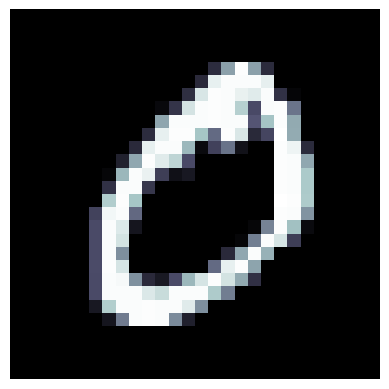

0


In [63]:
X, y = mnist["data"], mnist["target"]
rand_num = X.iloc[1]
rand_num_resh = rand_num.values.reshape(28, 28)

plt.imshow(rand_num_resh, cmap="bone")
plt.axis("off")
plt.show()

print(y.iloc[1])

In [65]:
y = y.astype(np.uint8)

In [67]:
X_train, y_train = X[:60000], y[:60000]
X_test, y_test = X[60000:], y[60000:]

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [71]:
sgd_clf.predict([rand_num])

C:\Users\Oscar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=uint8)

In [83]:
#MATRIZ DE CONFUSION: es una metrica que resume el rendimiento del modelo
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
confusion_m = confusion_matrix(y_train, y_train_pred)

In [85]:
# EJE X = Predicciones || EJE y = Originales
confusion_m

array([[5635,    0,   61,   10,   16,   50,   46,    7,   66,   32],
       [   3, 6393,   95,   21,   16,   47,   15,   27,  109,   16],
       [  72,   56, 5174,   89,   69,   39,  163,   66,  212,   18],
       [  58,   32,  217, 4941,   23,  441,   32,   56,  216,  115],
       [  11,   26,   46,    6, 5298,   26,   73,   32,   87,  237],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [  40,   13,   56,    6,   22,  113, 5625,    5,   36,    2],
       [  23,   24,  103,   36,  124,   40,   10, 5228,   75,  602],
       [  40,  101,  158,  122,   49,  457,   77,   35, 4666,  146],
       [  33,   18,   66,   83,  515,  127,    4,  485,  166, 4452]],
      dtype=int64)

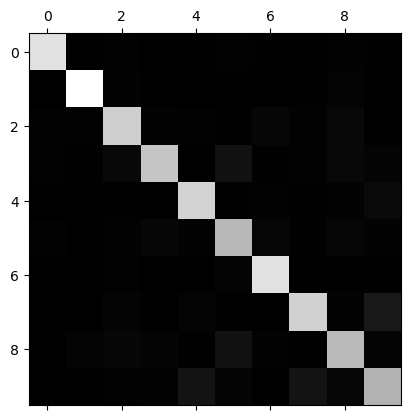

In [87]:
plt.matshow(confusion_m, cmap=plt.cm.gray)
plt.show()

In [91]:
forest_clf = RandomForestClassifier(random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [93]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train, cv=3)
confusion_m_forest = confusion_matrix(y_train, y_train_pred_forest)

In [95]:
confusion_m_forest

array([[5840,    1,    8,    2,    4,    9,   20,    1,   35,    3],
       [   1, 6635,   43,   11,   13,    5,    6,   13,   12,    3],
       [  27,   12, 5749,   30,   32,    4,   20,   37,   41,    6],
       [   7,    7,   91, 5811,    3,   63,    7,   49,   61,   32],
       [  12,   13,   14,    1, 5645,    0,   28,   14,   17,   98],
       [  20,    9,    9,   64,   12, 5198,   53,    6,   31,   19],
       [  26,   11,    5,    0,   12,   46, 5803,    0,   15,    0],
       [   4,   24,   58,    6,   37,    1,    0, 6037,   11,   87],
       [   9,   35,   44,   52,   26,   52,   27,    5, 5525,   76],
       [  21,   10,   14,   76,   75,   15,    3,   58,   45, 5632]],
      dtype=int64)

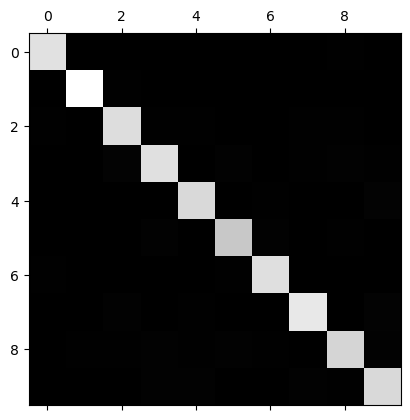

In [97]:
plt.matshow(confusion_m_forest, cmap=plt.cm.gray)
plt.show()